In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries loaded")

✓ Libraries loaded


In [3]:
df = pd.read_csv('../data/processed/modeling_dataset_early.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nTarget distribution:")
print(df['final_result'].value_counts())
print(f"\nPassed: {df['passed'].sum()} ({df['passed'].mean()*100:.1f}%)")
print(f"Failed: {df['failed'].sum()} ({df['failed'].mean()*100:.1f}%)")

Dataset shape: (22437, 43)

Target distribution:
final_result
Pass           12361
Fail            7052
Distinction     3024
Name: count, dtype: int64

Passed: 15385 (68.6%)
Failed: 7052 (31.4%)


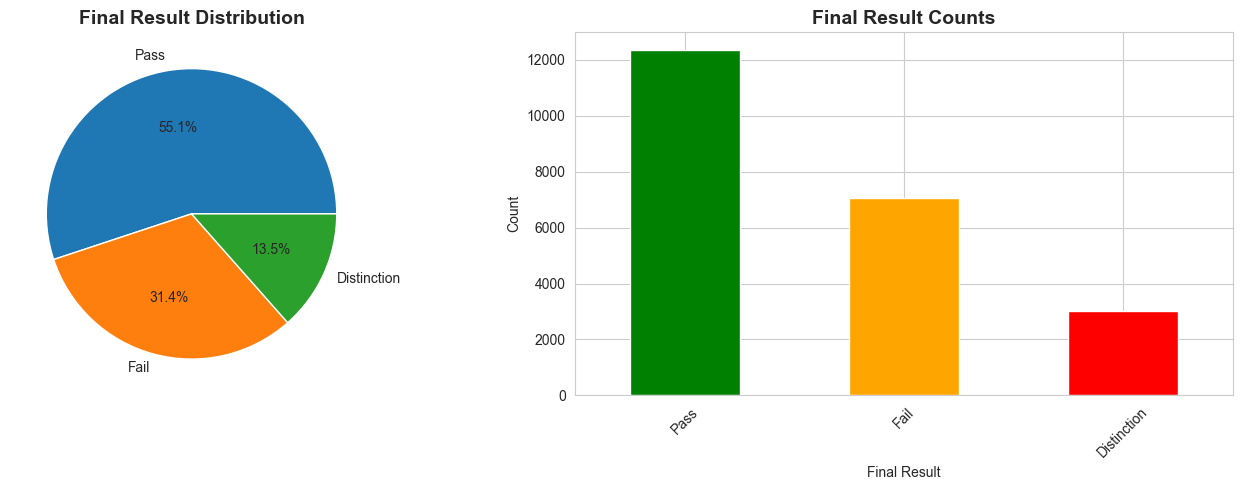

In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['final_result'].value_counts().plot(kind='pie', ax=axes[0], autopct='%1.1f%%')
axes[0].set_title('Final Result Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('')

df['final_result'].value_counts().plot(kind='bar', ax=axes[1], color=['green', 'orange', 'red'])
axes[1].set_title('Final Result Counts', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Final Result')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
Path('../results/figures').mkdir(parents=True, exist_ok=True)
plt.savefig('../results/figures/01_target_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

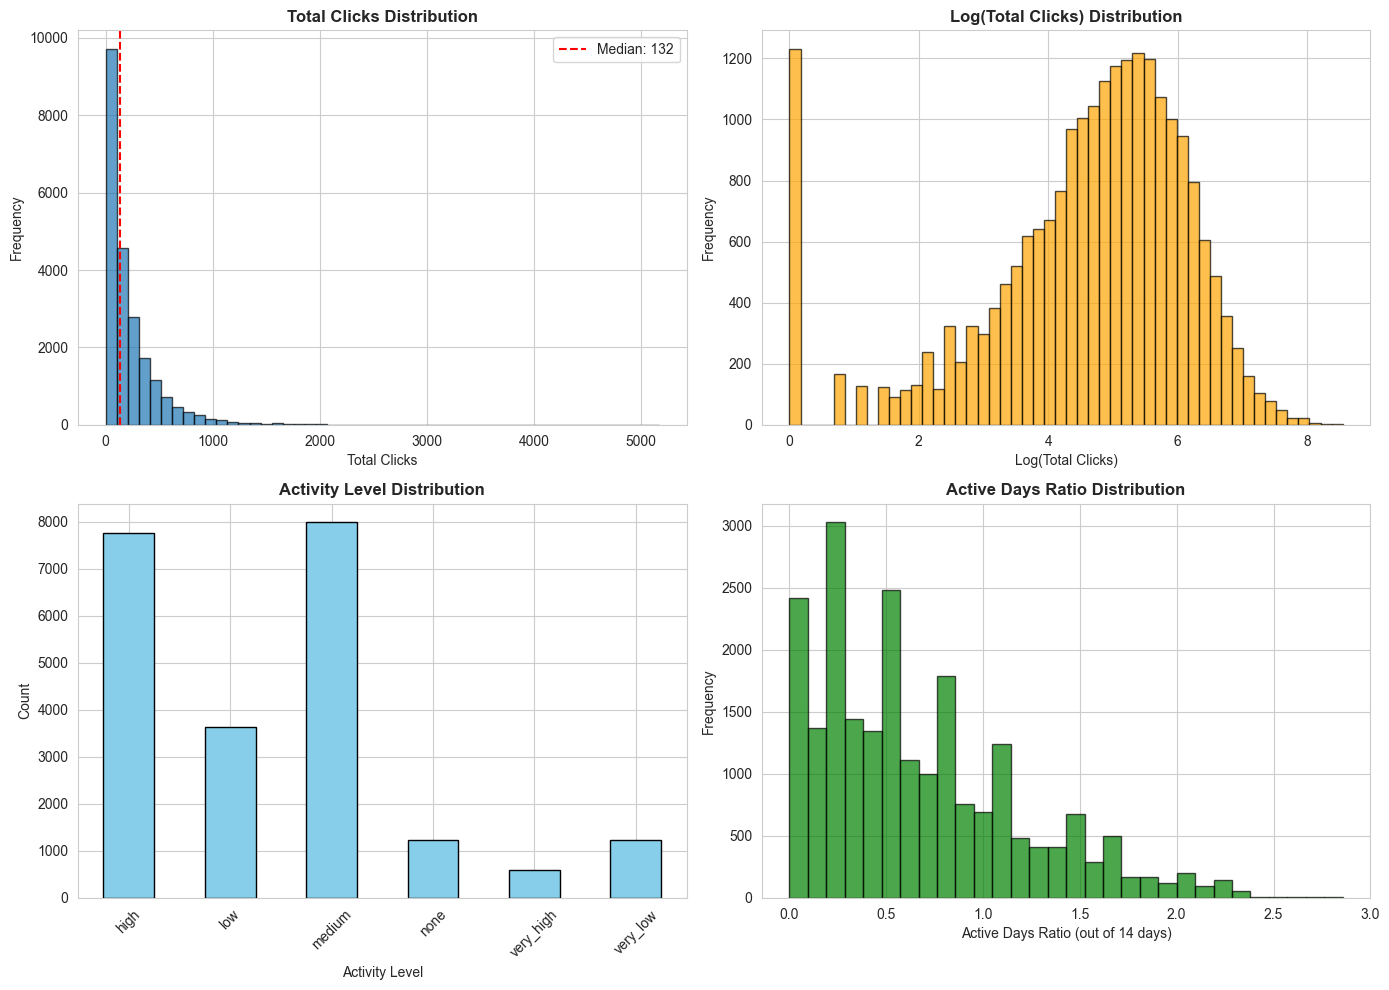

In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].hist(df['total_clicks'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Total Clicks Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Total Clicks')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df['total_clicks'].median(), color='red', linestyle='--', 
                    label=f'Median: {df["total_clicks"].median():.0f}')
axes[0, 0].legend()

axes[0, 1].hist(df['log_total_clicks'], bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 1].set_title('Log(Total Clicks) Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Log(Total Clicks)')
axes[0, 1].set_ylabel('Frequency')

df['activity_level'].value_counts().sort_index().plot(kind='bar', ax=axes[1, 0], 
                                                       color='skyblue', edgecolor='black')
axes[1, 0].set_title('Activity Level Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Activity Level')
axes[1, 0].set_ylabel('Count')
axes[1, 0].tick_params(axis='x', rotation=45)

axes[1, 1].hist(df['active_days_ratio'], bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1, 1].set_title('Active Days Ratio Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Active Days Ratio (out of 14 days)')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('../results/figures/02_activity_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

C:\Users\kuzne\AppData\Local\Temp\ipykernel_15220\167324811.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_plot, x='outcome', y='log_total_clicks', ax=axes[1], palette=['red', 'green'])


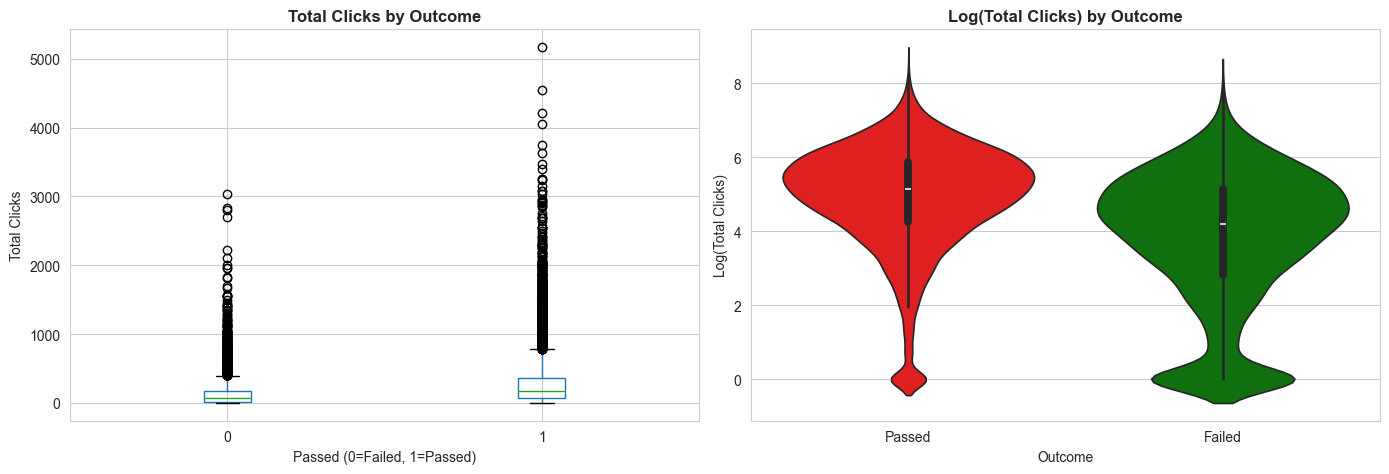

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df.boxplot(column='total_clicks', by='passed', ax=axes[0])
axes[0].set_title('Total Clicks by Outcome', fontweight='bold')
axes[0].set_xlabel('Passed (0=Failed, 1=Passed)')
axes[0].set_ylabel('Total Clicks')
plt.suptitle('')

df_plot = df.copy()
df_plot['outcome'] = df_plot['passed'].map({0: 'Failed', 1: 'Passed'})
sns.violinplot(data=df_plot, x='outcome', y='log_total_clicks', ax=axes[1], palette=['red', 'green'])
axes[1].set_title('Log(Total Clicks) by Outcome', fontweight='bold')
axes[1].set_xlabel('Outcome')
axes[1].set_ylabel('Log(Total Clicks)')

plt.tight_layout()
plt.savefig('../results/figures/03_activity_vs_outcome.png', dpi=150, bbox_inches='tight')
plt.show()

First Assessment Completion Rate: 12.2%
Average score (completed): 74.7


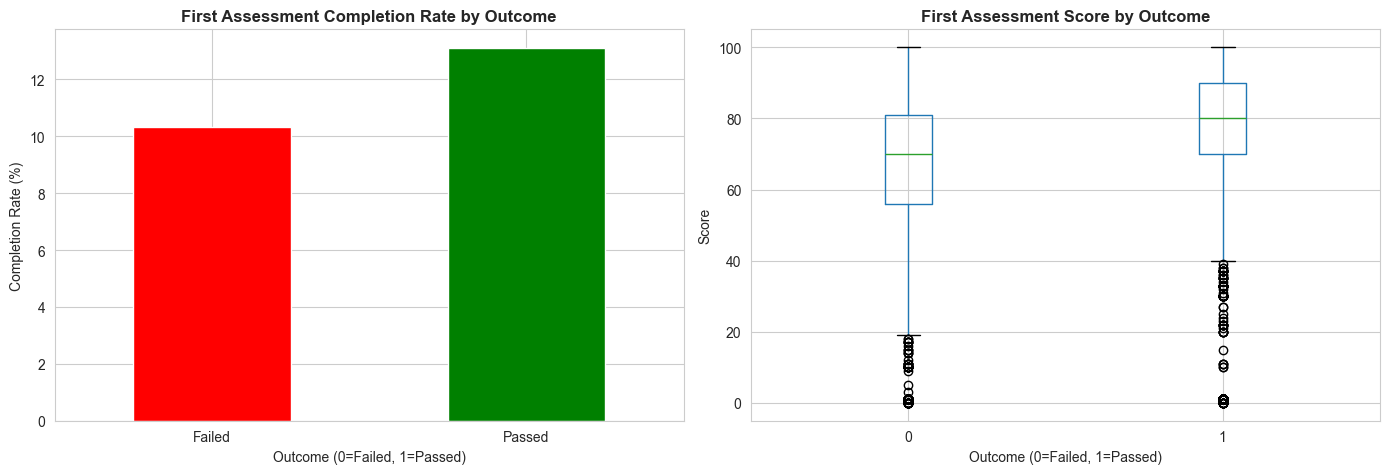

In [7]:
print(f"First Assessment Completion Rate: {df['completed_first_assessment'].mean()*100:.1f}%")
completed = df[df['first_assessment_score'].notna()]
print(f"Average score (completed): {completed['first_assessment_score'].mean():.1f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

completion = df.groupby('passed')['completed_first_assessment'].mean() * 100
completion.plot(kind='bar', ax=axes[0], color=['red', 'green'])
axes[0].set_title('First Assessment Completion Rate by Outcome', fontweight='bold')
axes[0].set_xlabel('Outcome (0=Failed, 1=Passed)')
axes[0].set_ylabel('Completion Rate (%)')
axes[0].set_xticklabels(['Failed', 'Passed'], rotation=0)

if len(completed) > 0:
    completed.boxplot(column='first_assessment_score', by='passed', ax=axes[1])
    axes[1].set_title('First Assessment Score by Outcome', fontweight='bold')
    axes[1].set_xlabel('Outcome (0=Failed, 1=Passed)')
    axes[1].set_ylabel('Score')
    plt.suptitle('')

plt.tight_layout()
plt.savefig('../results/figures/04_assessment_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

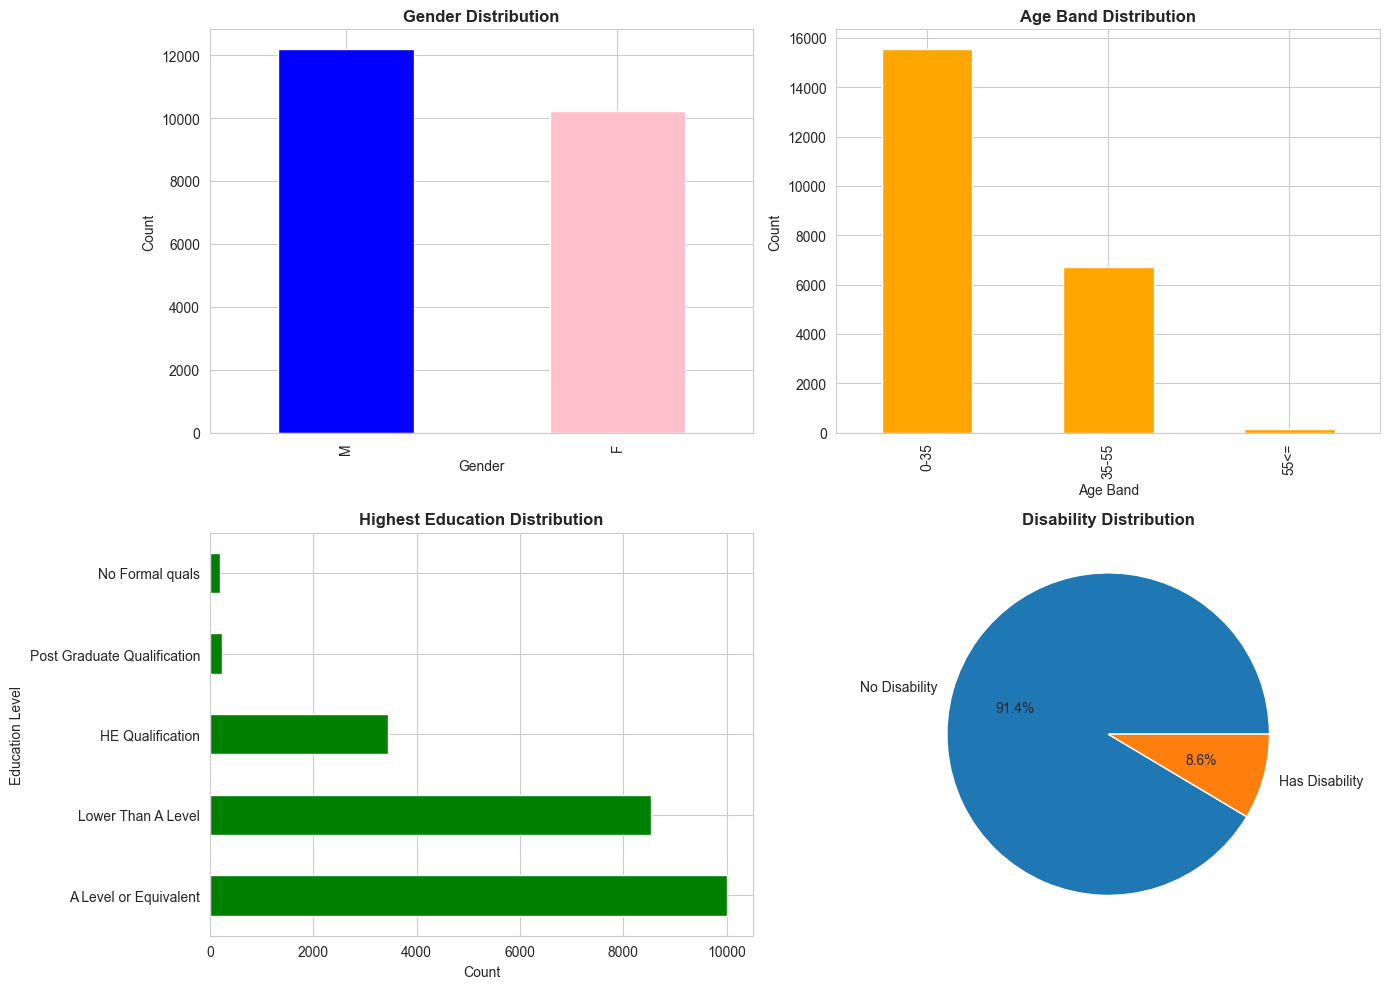

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

df['gender'].value_counts().plot(kind='bar', ax=axes[0, 0], color=['blue', 'pink'])
axes[0, 0].set_title('Gender Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Gender')
axes[0, 0].set_ylabel('Count')

df['age_band'].value_counts().plot(kind='bar', ax=axes[0, 1], color='orange')
axes[0, 1].set_title('Age Band Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Age Band')
axes[0, 1].set_ylabel('Count')

df['highest_education'].value_counts().plot(kind='barh', ax=axes[1, 0], color='green')
axes[1, 0].set_title('Highest Education Distribution', fontweight='bold')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Education Level')

df['has_disability'].value_counts().plot(kind='pie', ax=axes[1, 1], autopct='%1.1f%%', 
                                         labels=['No Disability', 'Has Disability'])
axes[1, 1].set_title('Disability Distribution', fontweight='bold')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.savefig('../results/figures/05_demographics.png', dpi=150, bbox_inches='tight')
plt.show()

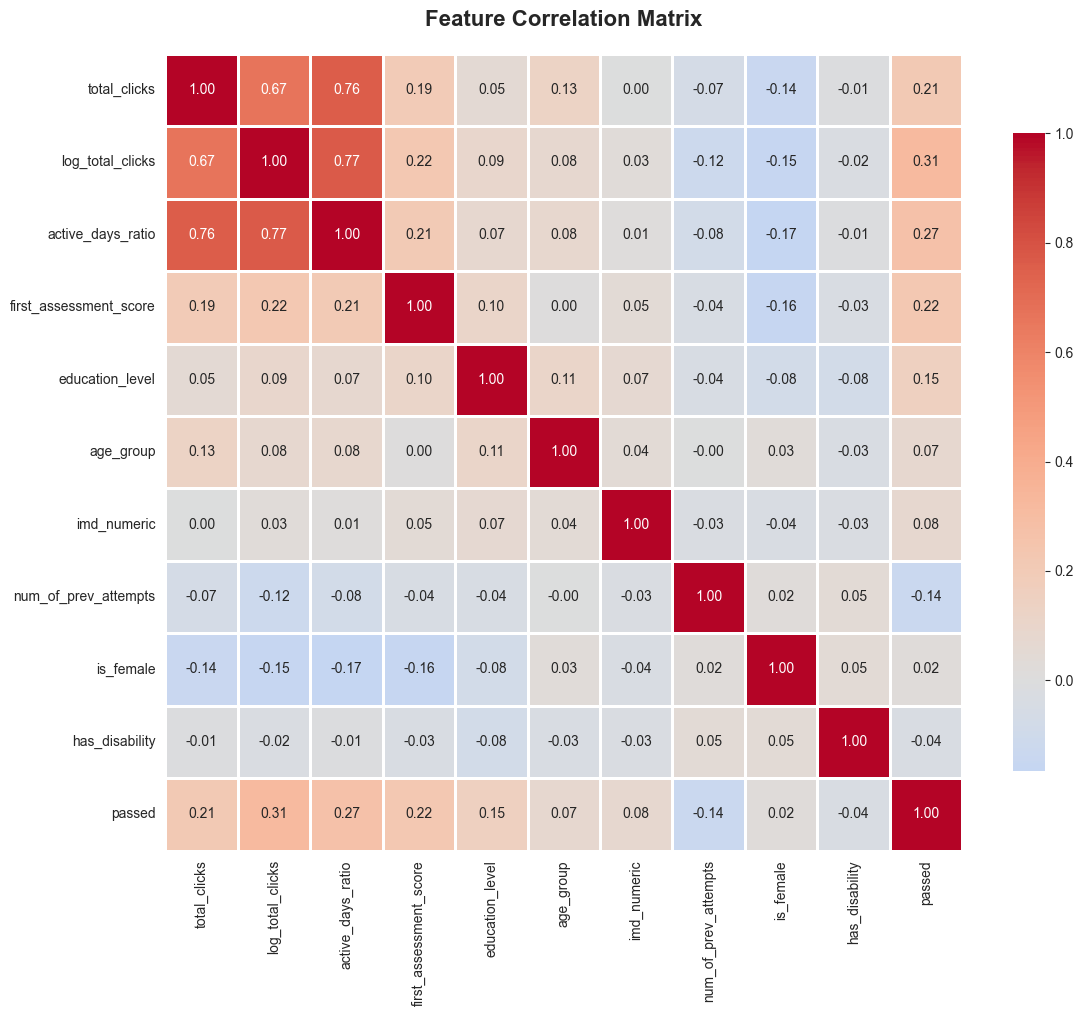

In [9]:
numeric_cols = ['total_clicks', 'log_total_clicks', 'active_days_ratio',
                'first_assessment_score', 'education_level', 'age_group', 
                'imd_numeric', 'num_of_prev_attempts', 'is_female', 
                'has_disability', 'passed']

corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('../results/figures/06_correlation_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

In [10]:
print("\n" + "="*60)
print("KEY STATISTICS SUMMARY")
print("="*60)

print(f"\n📊 Dataset Overview:")
print(f"   Total students: {len(df):,}")
print(f"   Features: {df.shape[1]}")
print(f"   Pass rate: {df['passed'].mean()*100:.1f}%")

print(f"\n📱 Activity Metrics:")
print(f"   Median clicks: {df['total_clicks'].median():.0f}")
print(f"   Students with zero activity: {(df['total_clicks'] == 0).sum():,} ({(df['total_clicks'] == 0).mean()*100:.1f}%)")
print(f"   Mean active days ratio: {df['active_days_ratio'].mean():.3f}")

print(f"\n📝 Assessment Metrics:")
print(f"   Completion rate: {df['completed_first_assessment'].mean()*100:.1f}%")
if df['completed_first_assessment'].sum() > 0:
    print(f"   Pass rate (completed): {df[df['completed_first_assessment']==1]['passed'].mean()*100:.1f}%")
    print(f"   Pass rate (not completed): {df[df['completed_first_assessment']==0]['passed'].mean()*100:.1f}%")

print(f"\n👥 Demographics:")
print(f"   Female: {df['is_female'].mean()*100:.1f}%")
print(f"   With disability: {df['has_disability'].mean()*100:.1f}%")
print(f"   Repeat students: {df['is_repeat'].mean()*100:.1f}%")

print("\n" + "="*60)


KEY STATISTICS SUMMARY

📊 Dataset Overview:
   Total students: 22,437
   Features: 43
   Pass rate: 68.6%

📱 Activity Metrics:
   Median clicks: 132
   Students with zero activity: 1,230 (5.5%)
   Mean active days ratio: 0.672

📝 Assessment Metrics:
   Completion rate: 12.2%
   Pass rate (completed): 73.5%
   Pass rate (not completed): 67.9%

👥 Demographics:
   Female: 45.6%
   With disability: 8.6%
   Repeat students: 12.0%

